# Importing the libraries

In [28]:
#importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from featurewiz import featurewiz

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Loading the dataset

In [5]:
#loading the dataset

collision_data = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', low_memory=False)
collision_data

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931862,09/27/2022,16:29,NaN,NaN,40.717130,-73.798600,"(40.71713, -73.7986)",GRAND CENTRAL PKWY,NaN,NaN,...,Driver Inexperience,NaN,NaN,NaN,4568110,Motorcycle,NaN,NaN,NaN,NaN
1931863,09/25/2022,11:16,QUEENS,11691,40.601955,-73.745415,"(40.601955, -73.745415)",BEACH 9 STREET,CAFFREY AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4568565,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
1931864,09/22/2022,9:30,QUEENS,11691,40.602627,-73.757750,"(40.602627, -73.75775)",NaN,NaN,22-46 LORETTA ROAD,...,Unspecified,Unspecified,NaN,NaN,4568580,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
1931865,09/24/2022,13:15,QUEENS,11101,40.742910,-73.938515,"(40.74291, -73.938515)",NaN,NaN,47-30 29 STREET,...,NaN,NaN,NaN,NaN,4568604,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


# Descriptive Analysis

In [73]:
#displaying the number of rows and columns of the dataset
print("Total number of Rows and Columns:",collision_data.shape)

Total number of Rows and Columns: (1931867, 29)


In [74]:
#displaying the data field values
print("\nColumn Names:\n",collision_data.columns)


Column Names:
 Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


In [75]:
#displaying the data types
print("\nData types:\n", collision_data.dtypes)


Data types:
 CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VE

In [76]:
#information about the dataframe
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931867 entries, 0 to 1931866
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

# Statistical Analysis

In [77]:
#describing the dataset
round(collision_data.describe(),2)

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1708825.00,1708825.00,1931849.00,1931836.00,1931867.00,1931867.00,1931867.00,1931867.00,1931867.00,1931867.00,1931867.00
mean,40.64,-73.77,0.29,0.00,0.05,0.00,0.03,0.00,0.21,0.00,3049602.52
std,1.88,3.56,0.68,0.04,0.24,0.03,0.16,0.01,0.65,0.03,1502895.11
min,0.00,-201.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00
25%,40.67,-73.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3096853.50
50%,40.72,-73.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3602131.00
75%,40.77,-73.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4085358.50
max,43.34,0.00,43.00,8.00,27.00,6.00,4.00,2.00,43.00,5.00,4568716.00


# Data Cleaning

In [78]:
#checking for null values in the each column of the dataset
for x in range(29):
    print("%-45s %10d" % (collision_data.columns.values[x], collision_data.iloc[:,x].isna().sum()))
print()

CRASH DATE                                             0
CRASH TIME                                             0
BOROUGH                                           599304
ZIP CODE                                          599538
LATITUDE                                          223042
LONGITUDE                                         223042
LOCATION                                          223042
ON STREET NAME                                    401257
CROSS STREET NAME                                 710430
OFF STREET NAME                                  1622980
NUMBER OF PERSONS INJURED                             18
NUMBER OF PERSONS KILLED                              31
NUMBER OF PEDESTRIANS INJURED                          0
NUMBER OF PEDESTRIANS KILLED                           0
NUMBER OF CYCLIST INJURED                              0
NUMBER OF CYCLIST KILLED                               0
NUMBER OF MOTORIST INJURED                             0
NUMBER OF MOTORIST KILLED      

In [6]:
#changing datatype of the variables

collision_data['CRASH DATE'] = collision_data['CRASH DATE'].astype('datetime64[ns]')
collision_data['CRASH TIME'] = collision_data['CRASH TIME'].astype('datetime64[ns]')
collision_data['BOROUGH'] = collision_data['BOROUGH'].astype('str')
#collision_data['ZIP CODE'] = collision_data['ZIP CODE'].astype('int')
collision_data['ON STREET NAME'] = collision_data['ON STREET NAME'].astype('str')
collision_data['CROSS STREET NAME'] = collision_data['CROSS STREET NAME'].astype('str')
collision_data['OFF STREET NAME'] = collision_data['OFF STREET NAME'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 1'] = collision_data['CONTRIBUTING FACTOR VEHICLE 1'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 2'] = collision_data['CONTRIBUTING FACTOR VEHICLE 2'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 3'] = collision_data['CONTRIBUTING FACTOR VEHICLE 3'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 4'] = collision_data['CONTRIBUTING FACTOR VEHICLE 4'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 5'] = collision_data['CONTRIBUTING FACTOR VEHICLE 5'].astype('str')
collision_data['VEHICLE TYPE CODE 1'] = collision_data['VEHICLE TYPE CODE 1'].astype('str')
collision_data['VEHICLE TYPE CODE 2'] = collision_data['VEHICLE TYPE CODE 2'].astype('str')
collision_data['VEHICLE TYPE CODE 3'] = collision_data['VEHICLE TYPE CODE 3'].astype('str')
collision_data['VEHICLE TYPE CODE 4'] = collision_data['VEHICLE TYPE CODE 4'].astype('str')
collision_data['VEHICLE TYPE CODE 5'] = collision_data['VEHICLE TYPE CODE 5'].astype('str')

#filling null values with 0 and then converting the datatype
collision_data['NUMBER OF PERSONS KILLED'] = collision_data['NUMBER OF PERSONS KILLED'].fillna(0)
collision_data['NUMBER OF PERSONS INJURED'] = collision_data['NUMBER OF PERSONS INJURED'].fillna(0)

collision_data['NUMBER OF PERSONS KILLED'] = collision_data['NUMBER OF PERSONS KILLED'].astype('int')
collision_data['NUMBER OF PERSONS INJURED'] = collision_data['NUMBER OF PERSONS INJURED'].astype('int')

print("Datatype conversion completed!")

Datatype conversion completed!


In [7]:
#replacing null values/blanks of Borough column with 'No Value'
collision_data['BOROUGH'] = collision_data['BOROUGH'].replace('NaN', 'No Value')
print("Replace Successful")

Replace Successful


In [8]:
#replacing null values/blanks of Contributing Factor 1 column with 'No Value'
collision_data['CONTRIBUTING FACTOR VEHICLE 1'] = collision_data['CONTRIBUTING FACTOR VEHICLE 1'].replace('NaN', 'No Value')
print("Replace Successful")

Replace Successful


In [9]:
#replacing null values/blanks of Vehicle Type Code 1 column with 'No Value'
collision_data['VEHICLE TYPE CODE 1'] = collision_data['VEHICLE TYPE CODE 1'].replace('NaN','No Value')
print("Replace Successful")

Replace Successful


In [10]:
#dropping columns which have maximum null values and are not required for analysis
collision_data = collision_data.drop(['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 2',
'CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
'VEHICLE TYPE CODE 5'], axis=1)
print("Variables dropped!")

Variables dropped!


In [11]:
#checking for cleaned data

print("Total number of Rows and Columns:",collision_data.shape)
print("Column Values:", collision_data.columns)


Total number of Rows and Columns: (1931867, 14)
Column Values: Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1'],
      dtype='object')


In [12]:
#checking for null values in the each column of the dataset after data cleaning
for x in range(14):
    print("%-45s %10d" % (collision_data.columns.values[x], collision_data.iloc[:,x].isna().sum()))
print()

CRASH DATE                                             0
CRASH TIME                                             0
BOROUGH                                                0
NUMBER OF PERSONS INJURED                              0
NUMBER OF PERSONS KILLED                               0
NUMBER OF PEDESTRIANS INJURED                          0
NUMBER OF PEDESTRIANS KILLED                           0
NUMBER OF CYCLIST INJURED                              0
NUMBER OF CYCLIST KILLED                               0
NUMBER OF MOTORIST INJURED                             0
NUMBER OF MOTORIST KILLED                              0
CONTRIBUTING FACTOR VEHICLE 1                          0
COLLISION_ID                                           0
VEHICLE TYPE CODE 1                                    0



# Distribution Plot

In [13]:
%matplotlib inline

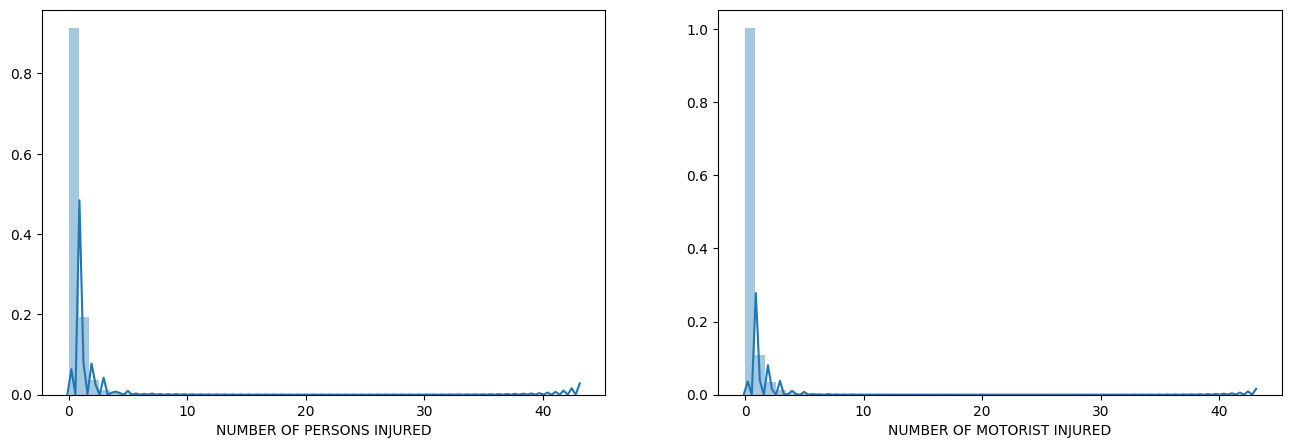

In [113]:
#plotting distribution for the number of persons, motorist, cyclist, and pedestrians injured

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(collision_data['NUMBER OF PERSONS INJURED'])
plt.subplot(1,2,2)
sns.distplot(collision_data['NUMBER OF MOTORIST INJURED'])
plt.show()

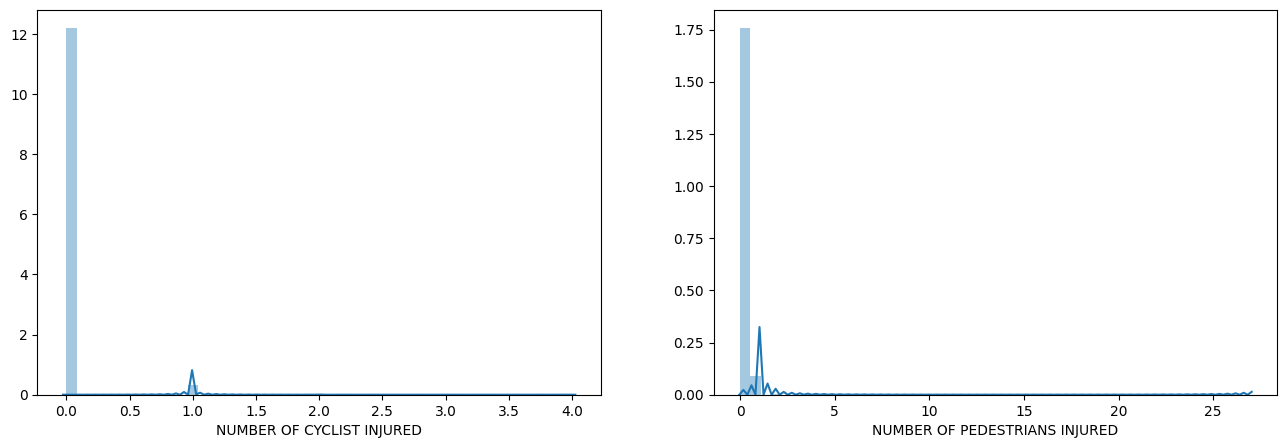

In [114]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(collision_data['NUMBER OF CYCLIST INJURED'])
plt.subplot(1,2,2)
sns.distplot(collision_data['NUMBER OF PEDESTRIANS INJURED'])
plt.show()

# Label Encoding

In [14]:
labelencoder = LabelEncoder()
collision_data['Borough Labels'] = labelencoder.fit_transform(collision_data["BOROUGH"])
collision_data['Contributing Factor Vehicle 1 Labels'] = labelencoder.fit_transform(collision_data["CONTRIBUTING FACTOR VEHICLE 1"])
collision_data['Vehicle Type Code 1 Labels'] = labelencoder.fit_transform(collision_data["VEHICLE TYPE CODE 1"])
collision_data.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,Borough Labels,Contributing Factor Vehicle 1 Labels,Vehicle Type Code 1 Labels
0,2021-09-11,2022-10-17 02:39:00,nan,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,4455765,Sedan,5,3,893
1,2022-03-26,2022-10-17 11:45:00,nan,1,0,0,0,0,0,1,0,Pavement Slippery,4513547,Sedan,5,39,893
2,2022-06-29,2022-10-17 06:55:00,nan,0,0,0,0,0,0,0,0,Following Too Closely,4541903,Sedan,5,21,893
3,2021-09-11,2022-10-17 09:35:00,BROOKLYN,0,0,0,0,0,0,0,0,Unspecified,4456314,Sedan,1,56,893
4,2021-12-14,2022-10-17 08:13:00,BROOKLYN,0,0,0,0,0,0,0,0,nan,4486609,nan,1,61,1287
5,2021-04-14,2022-10-17 12:47:00,nan,0,0,0,0,0,0,0,0,Unspecified,4407458,Dump,5,56,271
6,2021-12-14,2022-10-17 17:05:00,nan,0,0,0,0,0,0,0,0,Passing Too Closely,4486555,Sedan,5,36,893
7,2021-12-14,2022-10-17 08:17:00,BRONX,2,0,0,0,0,0,2,0,Unspecified,4486660,Sedan,0,56,893
8,2021-12-14,2022-10-17 21:10:00,BROOKLYN,0,0,0,0,0,0,0,0,Driver Inexperience,4487074,Sedan,1,12,893
9,2021-12-14,2022-10-17 14:58:00,MANHATTAN,0,0,0,0,0,0,0,0,Passing Too Closely,4486519,Sedan,2,36,893


In [19]:
#creating a new dataframe

new_collision_data = pd.DataFrame()

#new_collision_data['CRASH DATE'] = collision_data['CRASH DATE']
#new_collision_data['CRASH TIME'] = collision_data['CRASH DATE']
new_collision_data['Borough Labels'] = collision_data['Borough Labels']
new_collision_data['NUMBER OF PERSONS KILLED'] = collision_data['NUMBER OF PERSONS KILLED']
new_collision_data['NUMBER OF PERSONS INJURED'] = collision_data['NUMBER OF PERSONS INJURED']
new_collision_data['NUMBER OF PEDESTRIANS INJURED'] = collision_data['NUMBER OF PEDESTRIANS INJURED']
new_collision_data['NUMBER OF PEDESTRIANS KILLED'] = collision_data['NUMBER OF PEDESTRIANS KILLED']
new_collision_data['NUMBER OF CYCLIST INJURED'] = collision_data['NUMBER OF CYCLIST INJURED']
new_collision_data['NUMBER OF CYCLIST KILLED'] = collision_data['NUMBER OF CYCLIST KILLED']
new_collision_data['NUMBER OF MOTORIST INJURED'] = collision_data['NUMBER OF MOTORIST INJURED']
new_collision_data['NUMBER OF MOTORIST KILLED'] = collision_data['NUMBER OF MOTORIST KILLED']
new_collision_data['Contributing Factor Vehicle 1 Labels'] = collision_data['Contributing Factor Vehicle 1 Labels']
new_collision_data['Vehicle Type Code 1 Labels'] = collision_data['Vehicle Type Code 1 Labels']
new_collision_data['COLLISION_ID'] = collision_data['COLLISION_ID']

print("Dataframe created.")


Dataframe created.


# Correlation Plot

Text(0.5, 1.0, 'Correlation Plot')

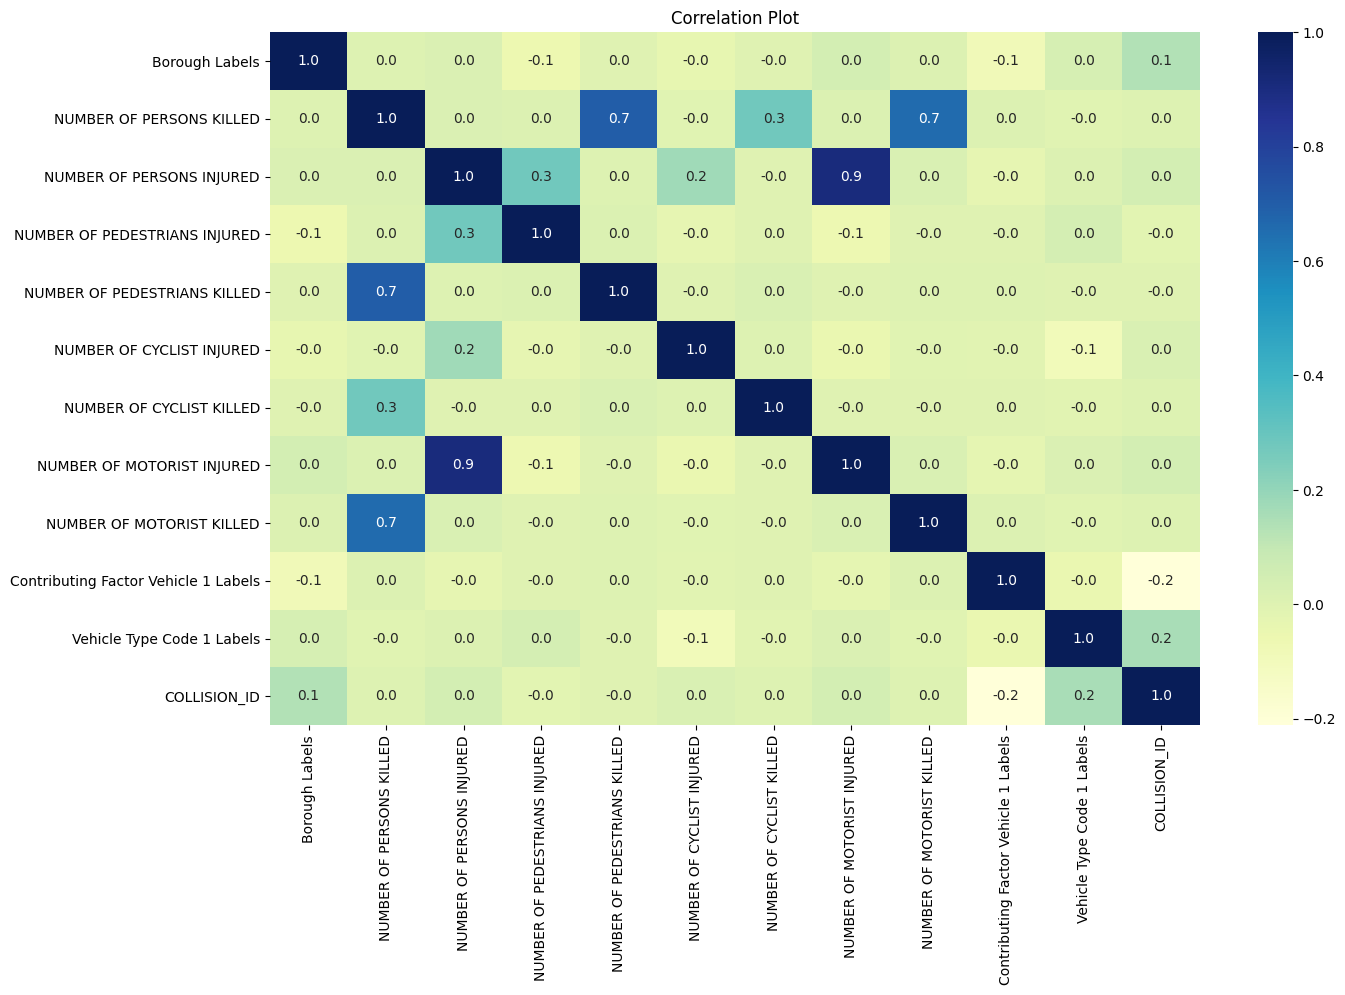

In [20]:
# correlation plot

plt.figure(figsize = (15,9))
ax = plt.subplot()
sns.heatmap(new_collision_data.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot')

# Feature Selection & Extraction

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (1931867, 12)
    Loaded train data. Shape = (1931867, 12)
 setting a hard limit of 900K samples for train since some it is huge and breaks pandas...
    Some column names had special characters which were removed...
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    l

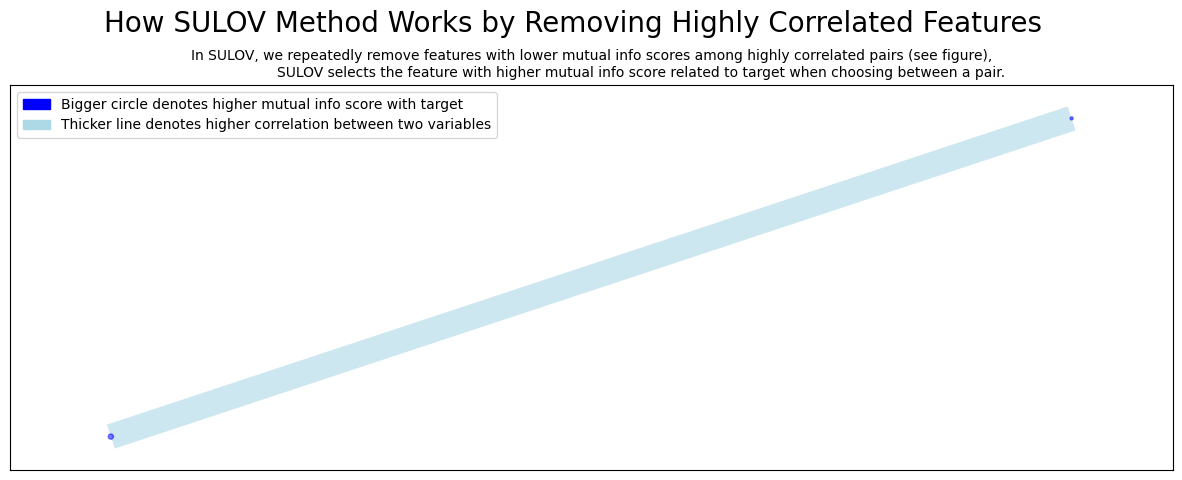

Time taken for SULOV method = 20 seconds
    Adding 0 categorical variables to reduced numeric variables  of 9
Final list of selected vars after SULOV = 9
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 9 
    XGBoost version: 1.6.1
Number of booster rounds = 20
        using 9 variables...
Regular XGBoost is crashing due to: [18:57:52] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/multiclass_obj.cu:123: SoftmaxMultiClassObj: label must be in [0, num_class).
[18:57:52] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

In [22]:
#automatic feature extraction

target = 'NUMBER OF PERSONS KILLED'

features, train = featurewiz(new_collision_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [23]:
print(features)

['Borough Labels', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED', 'Contributing Factor Vehicle 1 Labels', 'Vehicle Type Code 1 Labels', 'NUMBER OF PERSONS INJURED']


# Model Building

In [46]:
#creating a new dataframe for model building based on the features selected

new_model_collision_data = pd.DataFrame()

new_model_collision_data['Borough Labels'] = collision_data['Borough Labels']
new_model_collision_data['NUMBER OF PERSONS INJURED'] = collision_data['NUMBER OF PERSONS INJURED']
new_model_collision_data['NUMBER OF PEDESTRIANS INJURED'] = collision_data['NUMBER OF PEDESTRIANS INJURED']
new_model_collision_data['NUMBER OF PEDESTRIANS KILLED'] = collision_data['NUMBER OF PEDESTRIANS KILLED']
new_model_collision_data['NUMBER OF CYCLIST INJURED'] = collision_data['NUMBER OF CYCLIST INJURED']
new_model_collision_data['NUMBER OF CYCLIST KILLED'] = collision_data['NUMBER OF CYCLIST KILLED']
#new_model_collision_data['NUMBER OF MOTORIST INJURED'] = collision_data['NUMBER OF MOTORIST INJURED']       #removed since the variable is highly correlated with number of persons injured
new_model_collision_data['NUMBER OF MOTORIST KILLED'] = collision_data['NUMBER OF MOTORIST KILLED']
new_model_collision_data['Contributing Factor Vehicle 1 Labels'] = collision_data['Contributing Factor Vehicle 1 Labels']
new_model_collision_data['Vehicle Type Code 1 Labels'] = collision_data['Vehicle Type Code 1 Labels']
new_model_collision_data['COLLISION_ID'] = collision_data['COLLISION_ID']

print("Dataframe created.")


Dataframe created.


In [47]:
#extracting features and labels from the dataset

x = new_model_collision_data
y = collision_data['NUMBER OF PERSONS KILLED']

In [48]:
#splitting data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1545493, 10)
(386374, 10)


# Linear Regression Model

In [49]:
#linear regression model

linear_regressionmodel = LinearRegression()
linear_regressionmodel.fit(X_train, y_train)

LinearRegression()

In [50]:
#predict the result for the model

predicted_value_LR = linear_regressionmodel.predict(X_test)

In [51]:
#accuracy of the LR for training and testing set

print('Accuracy of Linear Regressor model on training set: {:.2f}'.format(linear_regressionmodel.score(X_train, y_train)))
print('Accuracy of Linear Regressor model on test set:     {:.2f}'.format(linear_regressionmodel.score(X_test, y_test)))

result_LR = linear_regressionmodel.score(X_test, y_test)
result_LR = round(result_LR,4)
result_LR

Accuracy of Linear Regressor model on training set: 0.98
Accuracy of Linear Regressor model on test set:     0.98


0.9826

In [52]:
#evaluating the model
print("Model Evaluation of Linear Regression.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_LR),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_LR),1))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_LR)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_LR))

Model Evaluation of Linear Regression.
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared value: 0.9826460733537029


# Decision Tree Regressor Model

In [54]:
#decision tree regressor

decisiontree_model = DecisionTreeRegressor(max_depth=5)
decisiontree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [55]:
#predict the result for the model

predicted_value_dt = decisiontree_model.predict(X_test)

In [56]:
#accuracy of the DT for training and testing set

print('Accuracy of Decision Tree Regressor model on training set: {:.2f}'.format(decisiontree_model.score(X_train, y_train)))
print('Accuracy of Decision Tree Regressor model on test set:     {:.2f}'.format(decisiontree_model.score(X_test, y_test)))

result_DT = decisiontree_model.score(X_test, y_test)
result_DT = round(result_DT,3)
result_DT

Accuracy of Decision Tree Regressor model on training set: 0.99
Accuracy of Decision Tree Regressor model on test set:     0.98


0.981

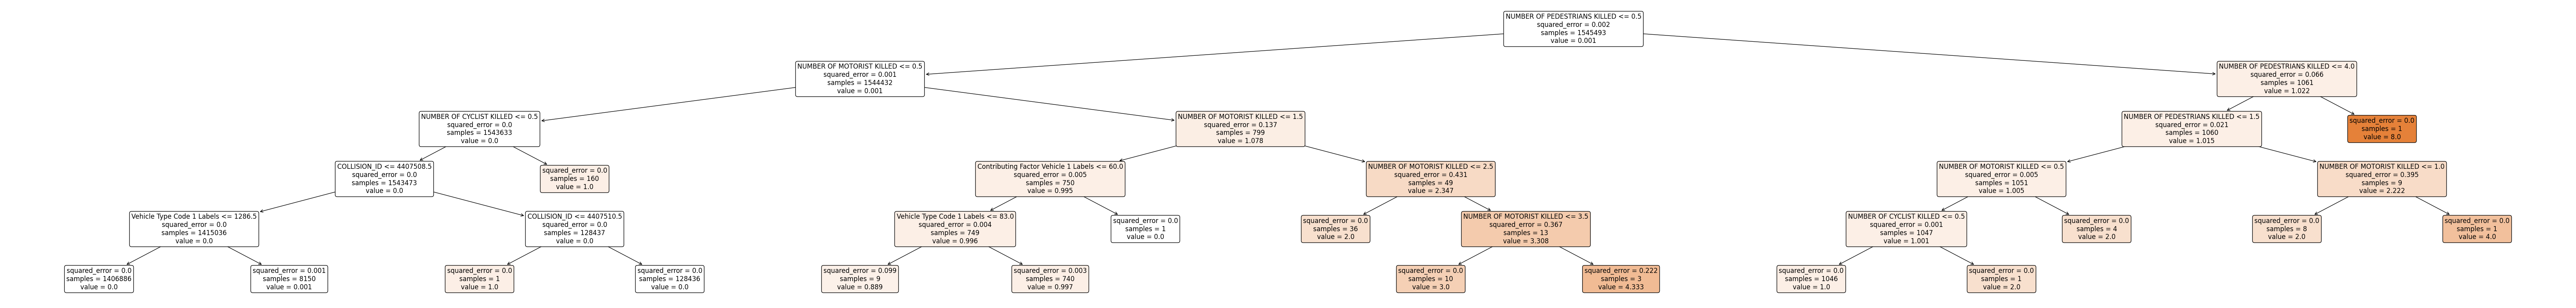

In [57]:
#plotting the decision tree

feature_names = x.columns

plt.figure(figsize=(85,10))
a = tree.plot_tree(decisiontree_model,
                   feature_names = feature_names,
                   class_names = collision_data['NUMBER OF PERSONS KILLED'],
                   rounded = True,
                   filled = True,
                   fontsize=12)
plt.show()

<AxesSubplot:>

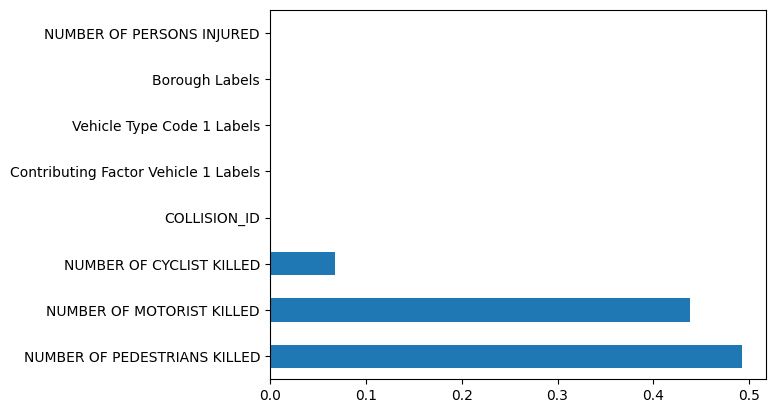

In [58]:
#feature importance for decision tree regressor

(pd.Series(decisiontree_model.feature_importances_, index=x.columns)
   .nlargest(8)
   .plot(kind='barh'))

In [59]:
#evaluating the model
print("Model Evaluation of Decision Tree Regressor.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_dt),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_dt),1))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_dt)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_dt))

Model Evaluation of Decision Tree Regressor.
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared value: 0.9808530602314666


# Random Forest Regressor Model

In [60]:
#random forest regressor

randomforest_model = RandomForestRegressor(n_estimators = 500, max_depth=3)
randomforest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [61]:
#predict the result for the model

predicted_value_rf = randomforest_model.predict(X_test)

In [62]:
#accuracy of the RF for training and testing set

print('Accuracy of Random Forest Regressor model on training set: {:.2f}'.format(randomforest_model.score(X_train, y_train)))
print('Accuracy of Random Forest Regressor model on test set:     {:.2f}'.format(randomforest_model.score(X_test, y_test)))

result_RF = randomforest_model.score(X_test, y_test)
result_RF = round(result_RF,3)
result_RF

Accuracy of Random Forest Regressor model on training set: 0.97
Accuracy of Random Forest Regressor model on test set:     0.98


0.977

<AxesSubplot:>

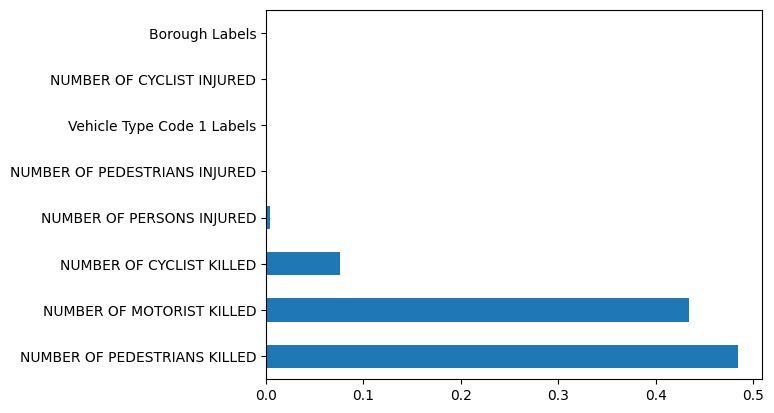

In [63]:
#feature importance for random forest regressor

(pd.Series(randomforest_model.feature_importances_, index=x.columns)
   .nlargest(8)
   .plot(kind='barh'))

In [64]:
#evaluating the model
print("Model Evaluation of Random Forest Regressor.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_rf),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_rf),1))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_rf)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_rf))

Model Evaluation of Random Forest Regressor.
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared value: 0.9768055430330816
